You would like to do some experiments with dice.

## Requirements

In [1]:
import collections
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## Two dice

When you throw two dice, what is the probability that the eyes will sum to 2, 3,..., 12?

### Implementation

The following function executes `nr_throws` independent throws with two fair dice and returns the sum of the eyes as a numpy array.

In [17]:
def throw_dice(nr_throws):
    return np.random.randint(1, 6 + 1, size=(nr_throws, )) + \
           np.random.randint(1, 6 + 1, size=(nr_throws, ))

We generate data for 1,000 and 100,000 throws.

In [18]:
throws_1_000 = throw_dice(1_000)
throws_100_000 = throw_dice(100_000)

We can now visualize the resulting distribution using Matplotlib's `hist` function.  We explicitely set the bins by specifying the boundaries.  Note that there are 11 bins, since we can throw any number between 2 and 12 inclusive using two dice.

The data is normalized by the `hist` function when we set the argument `density` to `True`.  The subplots share the $y$-axis to make it easier to compare the results.  The ticks on the $x$-axis are set explicitly.

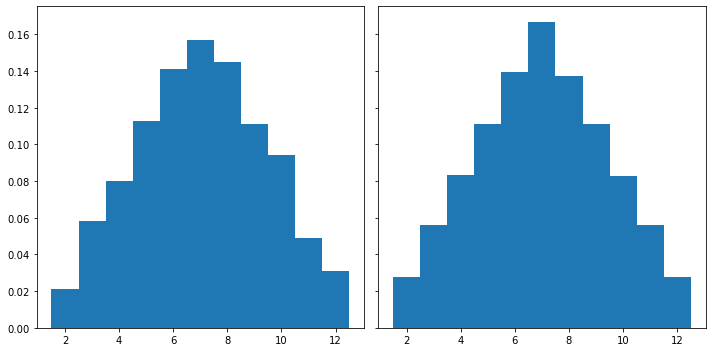

In [35]:
figure, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
bins = np.arange(1.5, 13.0, 1.0)
ticks = np.arange(2.0, 13.0, 2.0)
for i, data in enumerate([throws_1_000, throws_100_000]):
    axes[i].hist(data, bins=bins, density=True)
    axes[i].set_xticks(ticks)
figure.tight_layout()

## Sequences of dice rolls

When you roll a dice many times, what is the probability to roll two times the same eyes just after another, three times, four times and so on?

In [2]:
nr_thorws = 10
throws = np.random.randint(1, 6 + 1, size=nr_thorws)

In [3]:
throws

array([5, 3, 3, 4, 6, 6, 4, 1, 2, 3])

In [4]:
def count_repetitions(throws):
    repetitions = collections.defaultdict(int)
    for _, group in itertools.groupby(throws):
        sequence_length = len(tuple(group))
        repetitions[sequence_length] += 1
    return repetitions

In [5]:
count_repetitions(throws)

defaultdict(int, {1: 6, 2: 2})

In [43]:
def count_repetitions_naive(throws):
    repetitions = collections.defaultdict(int)
    sequence_length = 1
    previous_eyes = throws[0]
    for eyes in throws[1:]:
        if eyes == previous_eyes:
            sequence_length += 1
        else:
            repetitions[sequence_length] += 1
            previous_eyes = eyes
            sequence_length = 1
    else:
        repetitions[sequence_length] += 1
    return repetitions

In [25]:
throws

array([1, 1, 2, 4, 5, 5, 1, 1, 6, 6])

In [33]:
count_repetitions_naive(throws)

defaultdict(int, {2: 1, 1: 8})

In [34]:
count_repetitions(throws)

defaultdict(int, {2: 1, 1: 8})

In [44]:
for _ in range(1_000):
    nr_thorws = 1_000
    throws = np.random.randint(1, 6 + 1, size=nr_thorws)
    counts = count_repetitions(throws)
    counts_naive = count_repetitions_naive(throws)
    assert counts_naive == counts, 'counts are not equal'

In [38]:
throws = np.random.randint(1, 6 + 1, size=1_000_000)

In [39]:
%timeit count_repetitions(throws)

210 ms ± 8.58 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [40]:
%timeit count_repetitions_naive(throws)

93.8 ms ± 2.42 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [45]:
throws = np.random.randint(1, 6 + 1, size=1_000_000)

In [46]:
counts = count_repetitions_naive(throws)

In [47]:
counts

defaultdict(int,
            {2: 116010,
             1: 694887,
             4: 3190,
             3: 19011,
             5: 536,
             7: 13,
             6: 81,
             8: 3,
             9: 1,
             10: 1})

In [49]:
max(counts.keys())

10

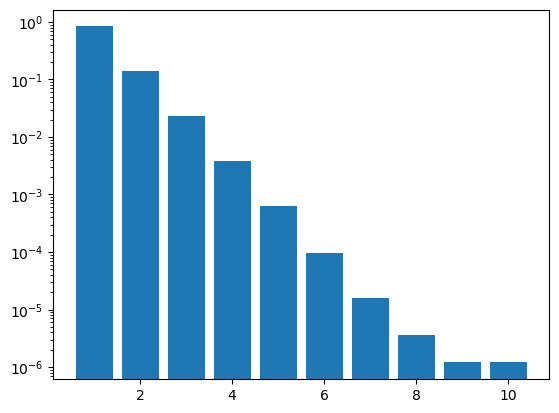

In [54]:
x = list(range(1, max(counts.keys()) + 1))
y = [counts[i]/sum(counts.values()) for i in x]
plt.bar(x, y)
plt.yscale('log');